In [1]:
from os import listdir, system
from sys import argv

import numpy as np


from modules.spline import *
from modules.stats import *
from modules.helper_functions import *
from modules.plot_functions import *

import matplotlib

import __main__

In [2]:
executed_as_python = hasattr(__main__, '__file__')
saveimage = False
if executed_as_python:
    matplotlib.use('Agg')
    saveimage = True

In [3]:
# Insert Elvis directory here
elvis_iso_dir = "../../../Project/Elvis/IsolatedTrees"

# Insert suite name here
suite_name = "iRoy"

if executed_as_python:
    suite_name = argv[1]

In [4]:
# Do not modify
data = read_elvis_tracks(elvis_iso_dir, suite_name,varnames = ['Mvir','scale','X','Y','Z','ID','pID','Rvir','Vx','Vy','Vz'])

0it [00:00, ?it/s]

In [5]:
# plot_pretty()

In [6]:
num_halos = get_num_halos(data)
num_time = get_num_time(data)

In [7]:
df = pd.read_csv(f'timedata/{suite_name}.csv')
arr_row = np.array(df['row'])

_, _, X0, Y0, Z0, Rvir0 = extract_data(data, 0, isVel = False, isRvir = True)

X = (data['X'][arr_row][:,0] - X0[0]) / Rvir0[0]
Y = (data['Y'][arr_row][:,0] - Y0[0]) / Rvir0[0]
Z = (data['Z'][arr_row][:,0] - Z0[0]) / Rvir0[0]

inside_index = (X**2 + Y**2 + Z**2 < 1)

new_X = X[inside_index]
new_Y = Y[inside_index]
new_Z = Z[inside_index]

r = (new_X**2 + new_Y**2 + new_Z**2)**(1/2)

print(np.median(r))

# temp_arr = np.arange(len(new_X))
# ran_choice = np.random.choice(temp_arr, 11, replace=False)

# new_X = new_X[ran_choice]
# new_Y = new_Y[ran_choice]
# new_Z = new_Z[ran_choice]

pos = np.array([new_X, new_Y, new_Z]).T

0.5686229380927317


In [8]:
# arr_row, arr_time, arr_pos_acc, arr_vec_acc, arr_ang_pos_acc, arr_ang_vec_acc, arr_pos_cur, arr_vec_cur, arr_ang_pos_cur, arr_ang_vec_cur, arr_pos_cur_dis, arr_vec_cur_dis, arr_mass_acc, arr_mass_cur = get_arrays(suite_name, data)

In [9]:
rms, normal_vector, coef = get_min_vec(pos, num_random_points=10000)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

xx, yy = np.meshgrid(x,y)

z = (coef - normal_vector[0]*xx - normal_vector[1]*yy) / normal_vector[2]

<IPython.core.display.Javascript object>


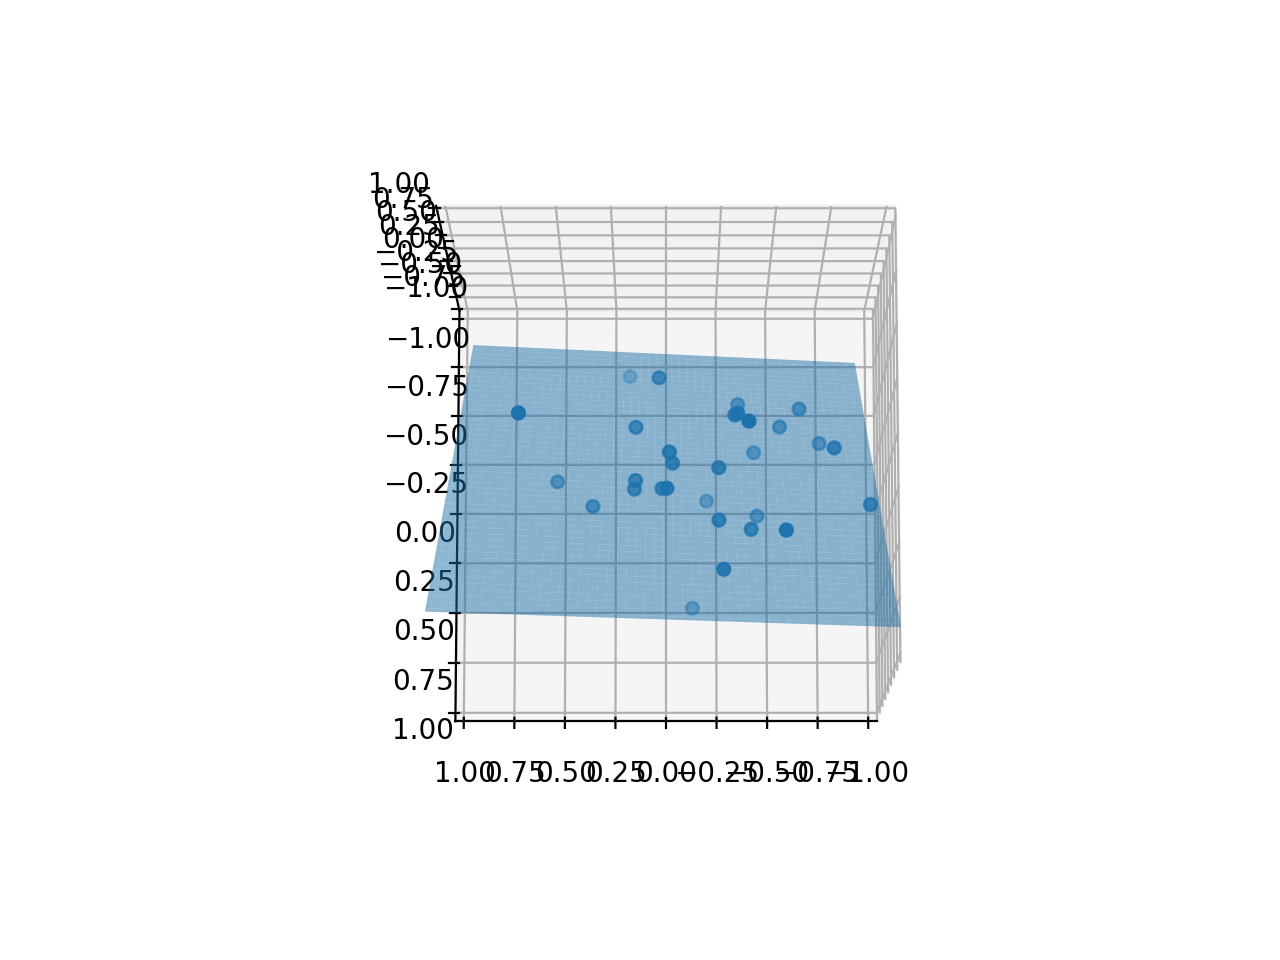

In [10]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ax.set_box_aspect(aspect = (1,1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.scatter(new_X,new_Y,new_Z)
ax.plot_surface(xx, yy, z, alpha = 0.5)